In [62]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [63]:
import pandas as pd # 분석용 파이썬 라이브러리 패키지
import numpy as np # 계산용 파이썬 라이브러리 패키지
import matplotlib as mpl
import matplotlib.pyplot as plt # 시각화 파이썬 라이브러리 패키지
import seaborn as sns # 시각화 파이썬 라이브러리 패키지 as는 seaborn을 sns로 쓰겠다는 말

data = pd.read_csv("/content/drive/MyDrive/sit0906.csv", encoding="euc-kr")
data

,XYsh,mXYear,XYkn,XYbt,NA,SA,clasf1,clasf2,clasf3
0,"(264, 196)","(215, 106)","(235, 443)","(35, 407)",30.0,170.0,SIT,BAD1,sit_bad_5_85.jpg
1,"(251, 197)","(211, 106)","(230, 444)","(33, 405)",20.0,170.0,SIT,BAD1,sit_bad_5_82.jpg
2,"(253, 199)","(213, 107)","(226, 441)","(33, 407)",20.0,170.0,SIT,BAD1,sit_bad_5_83.jpg
3,"(157, 171)","(178, 77)","(82, 393)","(274, 393)",80.0,0.0,SIT,BAD1,20220817_190913_025.jpg
4,"(165, 114)","(179, 23)","(66, 300)","(256, 300)",80.0,0.0,SIT,BAD1,20220817_190913_006.jpg
...,...,...,...,...,...,...,...,...,...
1736,"(123, 330)","(145, 142)","(175, 830)","(568, 905)",80.0,10.0,SIT,GOOD,IMG_9713.jpg
1737,"(120, 329)","(142, 143)","(169, 830)","(565, 908)",80.0,10.0,SIT,GOOD,IMG_9716.jpg
1738,"(114, 330)","(138, 144)","(165, 833)","(558, 908)",80.0,10.0,SIT,GOOD,IMG_9717.jpg
1739,"(116, 330)","(138, 143)","(168, 833)","(561, 907)",80.0,10.0,SIT,GOOD,IMG_9715.jpg


In [64]:
kmeans_data = data[["NA", "SA"]] # 필요한 행만 가져옴

In [65]:
# 데이터 표준화 # 군집화 하려면 필수

from sklearn.preprocessing import StandardScaler
# Standardization 평균 0 / 분산 1

scaler = StandardScaler()   
scaler = scaler.fit_transform(kmeans_data)

scaler = pd.DataFrame(scaler)
scaler = scaler.rename(columns = {0:'NA', 1:'SA'}) 
scaler

,NA,SA
0,-1.015856,0.895889
1,-1.352477,0.895889
2,-1.352477,0.895889
3,0.667248,-1.253388
4,0.667248,-1.253388
...,...,...
1736,0.667248,-1.126960
1737,0.667248,-1.126960
1738,0.667248,-1.126960
1739,0.667248,-1.126960


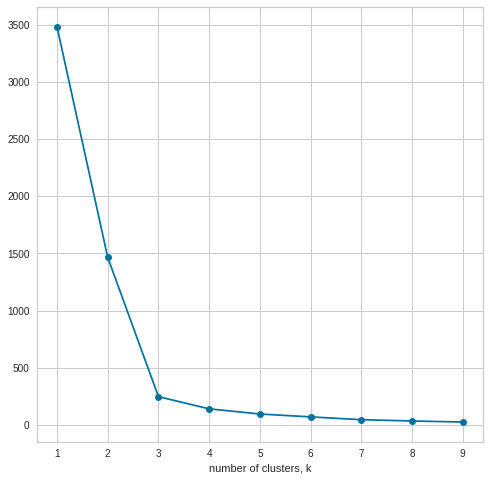

In [66]:
# 굴곡이 사라지는게 가장 최적의 값, Elbow

from sklearn.cluster import KMeans

ks = range(1,10)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(scaler)
    inertias.append(model.inertia_)

# Plot ks vs inertias
plt.figure(figsize=(8, 8))

plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('')
plt.xticks(ks)
plt.show()

In [67]:
# 스케일된 데이터를 넣어 클러스터링
kmeans = KMeans(n_clusters=3, random_state=0) # k값은 아까 구한 값
clusters = kmeans.fit(scaler)

#클러스터링 변수인 clusters 값을 원본 데이터 내에 넣기 
scaler['cluster'] = clusters.labels_
scaler

,NA,SA,cluster
0,-1.015856,0.895889,1
1,-1.352477,0.895889,1
2,-1.352477,0.895889,1
3,0.667248,-1.253388,0
4,0.667248,-1.253388,0
...,...,...,...
1736,0.667248,-1.126960,0
1737,0.667248,-1.126960,0
1738,0.667248,-1.126960,0
1739,0.667248,-1.126960,0


In [68]:
scaler.groupby('cluster').count() # cluster로 묶인것만 카운트

,NA,SA
cluster,,
0,746,746
1,412,412
2,583,583


In [69]:
# 그룹별 평균값

scaler.groupby('cluster').mean()

,NA,SA
cluster,,
0,0.481339,-1.144924
1,-1.678476,0.848325
2,0.570246,0.865529


In [82]:
# 클러스터가 날아가서 임시로 만들어줌

cluster = scaler[["cluster"]]
cluster

,cluster
0,1
1,1
2,1
3,0
4,0
...,...
1736,0
1737,0
1738,0
1739,0


In [76]:
scaler1 = scaler[["NA", "SA"]]

# 여기부턴 생략해도 됩니다

In [88]:
# 값이 2개인데 차원축소를 안시키면 표시가안됨
# 생략해도 괜찮은데 그림으로 보기 위해 넣어봄

from sklearn.decomposition import PCA 
X = scaler.copy() # 표준화 변수를 copy한 새로운 변수 'X'를 만들어 PCA를 적용

#객체
pca = PCA(n_components=2) # 2개로 축소

#적용
pca.fit(X)
X_pca = pca.transform(X)
X_pca

array([[-1.10472887,  0.74514153],
       [-1.23483956,  1.04241457],
       [-1.23483956,  1.04241457],
       ...,
       [ 1.59103919, -0.04088974],
       [ 1.59103919, -0.04088974],
       [ 1.59103919, -0.04088974]])

In [89]:
# 보기 편하게 데이터프레임으로 표시

pca_scaler = pd.DataFrame(X_pca)
pca_scaler

,0,1
0,-1.104729,0.745142
1,-1.234840,1.042415
2,-1.234840,1.042415
3,1.684200,-0.025428
4,1.684200,-0.025428
...,...,...
1736,1.591039,-0.040890
1737,1.591039,-0.040890
1738,1.591039,-0.040890
1739,1.591039,-0.040890


In [90]:
# 날아갔던 클러스터를 다시 합쳐줌

pca_scaler = pd.concat([pca_scaler, cluster], axis=1)
pca_scaler

,0,1,cluster
0,-1.104729,0.745142,1
1,-1.234840,1.042415,1
2,-1.234840,1.042415,1
3,1.684200,-0.025428,0
4,1.684200,-0.025428,0
...,...,...,...
1736,1.591039,-0.040890,0
1737,1.591039,-0.040890,0
1738,1.591039,-0.040890,0
1739,1.591039,-0.040890,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


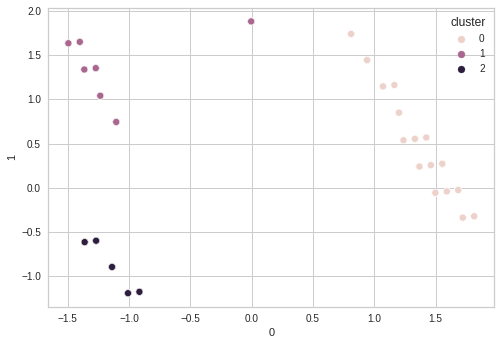

In [92]:
axs = plt.subplots()
axs_KK = sns.scatterplot(0, 1, hue='cluster', data=pca_scaler)